In [80]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#loading the data set and checking whether it has got loaded correctly
dataset=pd.read_csv('D:\\GL\\ml-gl-backup-master\\ml-gl-backup-master\\Projects\\Project1\\diabetes.csv')
dataset_copy = dataset.copy(deep = True)
dataset_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
#checking for null values and datatyppes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



There are missing values in the dataset. This is evident from the fact that minimum values are indicated as zero in Insulin/BMI/Glucose/BP/SkinThickness.We also get to know that the data set has got the patients that fall in age between 21 and 81. 

In [26]:
dataset.isna().sum() #checking for null values columnwise

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null values are there in the dataset is evident from the result above

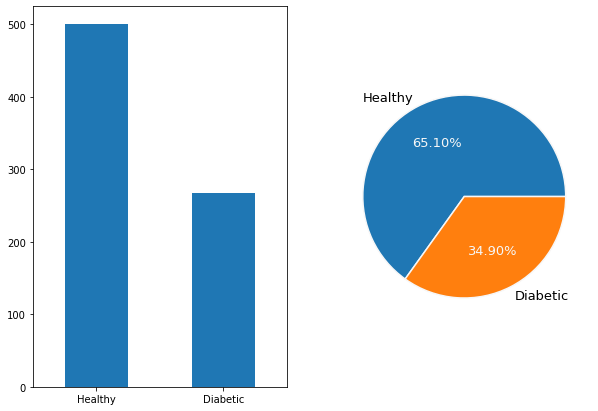

In [27]:
#checking out the percentage of people having diabetes in the data set 
f, ax = plt.subplots(1, 2, figsize = (10, 7))
_ = dataset.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0).set(xticklabels = ["Healthy", "Diabetic"])
_ = dataset.Outcome.value_counts().plot.pie(labels = ("Healthy", "Diabetic"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

The data visualization shows the data is skewed as the data represents more healthy people and less of diabetic people(Almost double).
The model will behave good for identifying person as healthy than identifying them as diabetic

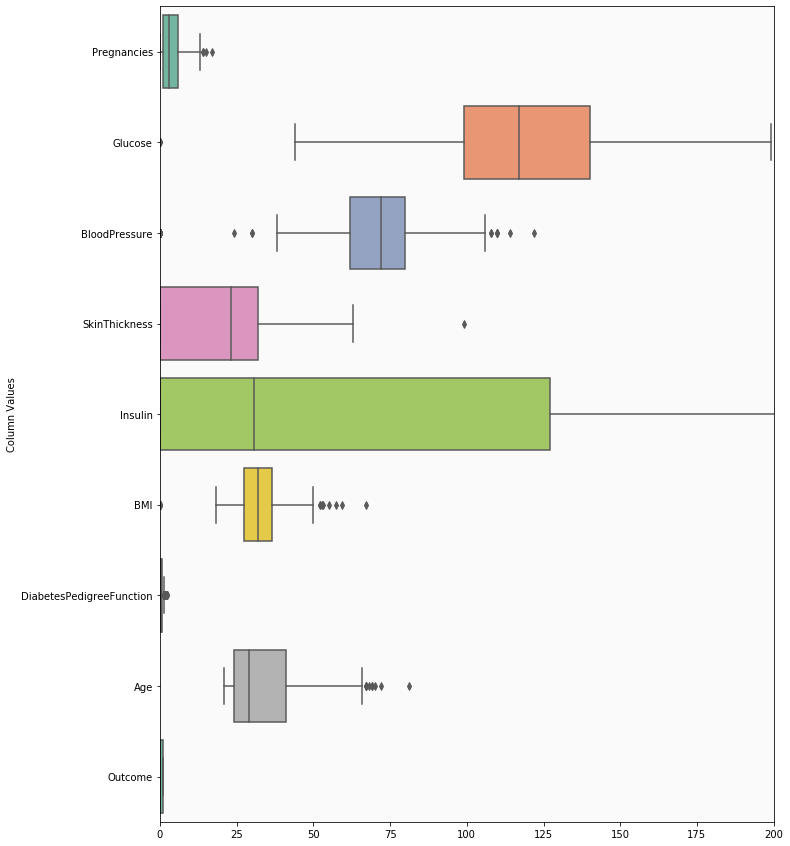

In [28]:
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Column Values')
ax = sns.boxplot(data = dataset, 
  orient = 'h', 
  palette = 'Set2')

Skewness in each column and the density of outliers in the data is evident from the above plot. The mean is mostly effected because of the number of zero values present in the columns that we had identified as a part of stat description of the data set.

In [29]:

dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset_copy.isnull().sum())
#after replacing zero with NaN ,let us see for null values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As seen here, after replacing zero values with NaN, we get to know there is a lot of null data in the dataset.

In [42]:
dataset_copy['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset_copy['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset_copy['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset_copy['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset_copy['BMI'].fillna(dataset['BMI'].median(), inplace = True)

We are replacing all the columns' values that are zero with the mean or median of the data so that the Null values are imputed with a more logical data. This might not be the best way but we cannot afford of losing the data as the dataset is quite small.
Median is used for insulin and BMI as they cannot be mean of the data. They differ a lot person to person rather than for a tribe.

In [44]:
#getting the count of healthy and diabetic people for visual analysis ease
healthy=dataset_copy[dataset_copy['Outcome']==0]
diabetic=dataset_copy[dataset_copy['Outcome']==1]

In [45]:
healthy.describe()#checkinng for healthy people's metrics. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.705367,70.810008,26.058000,83.1880,30.880200,0.429734,31.190000,0.0
std,3.017185,24.715021,11.932269,8.725532,89.5657,6.503074,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.0000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,22.000000,30.5000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,70.000000,23.000000,39.0000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,105.0000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.0000,57.300000,2.329000,81.000000,0.0


In [46]:
diabetic.describe()#checkinng for diabetic people's metrics.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164,1.0
std,3.741239,29.545943,12.016572,9.676886,127.689084,6.596704,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,23.000000,30.500000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,30.500000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


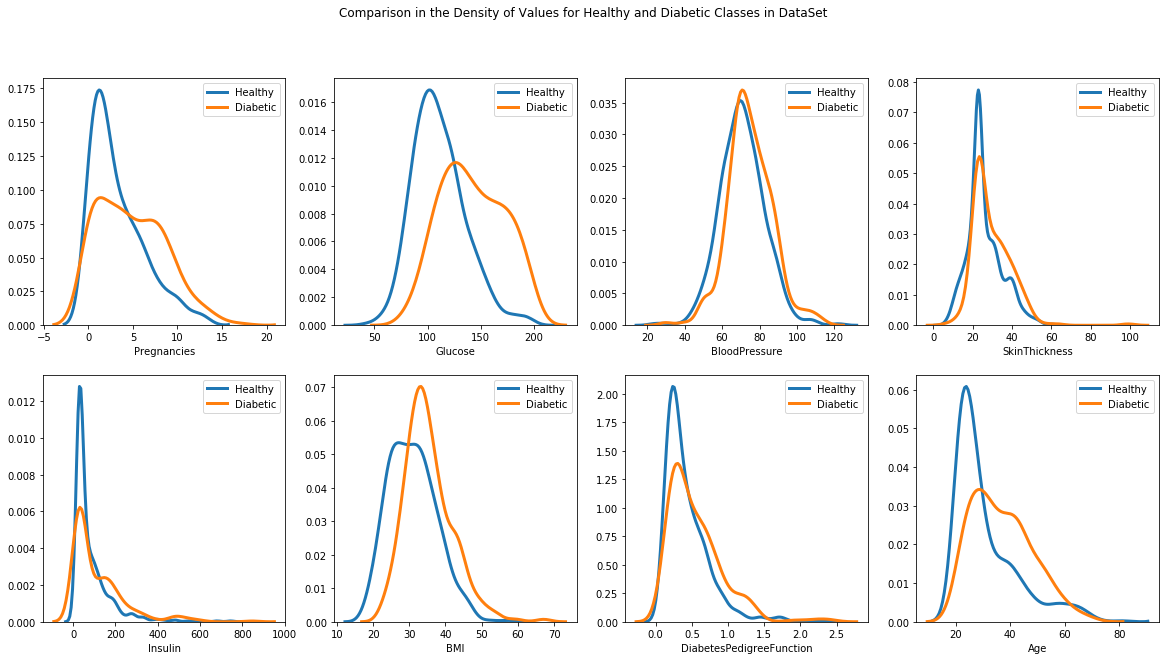

In [47]:
#comparing all the description values in terms of their distribituion in Probability Density Functions
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=0

for i in range(2):
    for j in range(4):
        
        sns.distplot(healthy.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Healthy',ax = axes[i][j])
        sns.distplot(diabetic.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Diabetic',ax = axes[i][j])
        axes[i][j].legend()
        count=count+1
        
f.suptitle('Comparison in the Density of Values for Healthy and Diabetic Classes in DataSet')
plt.show()

We get an idea of data distribution across the two class of people in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE68A82630>,
      dtype=object)

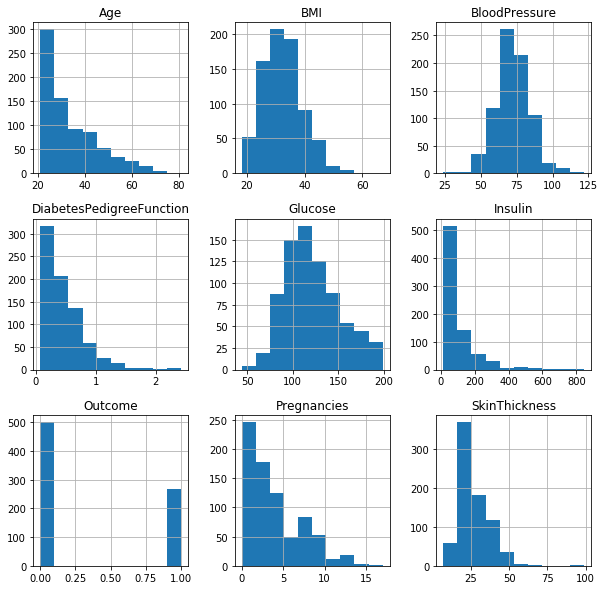

In [48]:
#checking the distribution for each column after replacement of 0 with respective mesaure of central tendency values
dataset_copy.hist(figsize = (10,10))

Distribution of data across the entire dataset

D:\Softwares\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Softwares\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


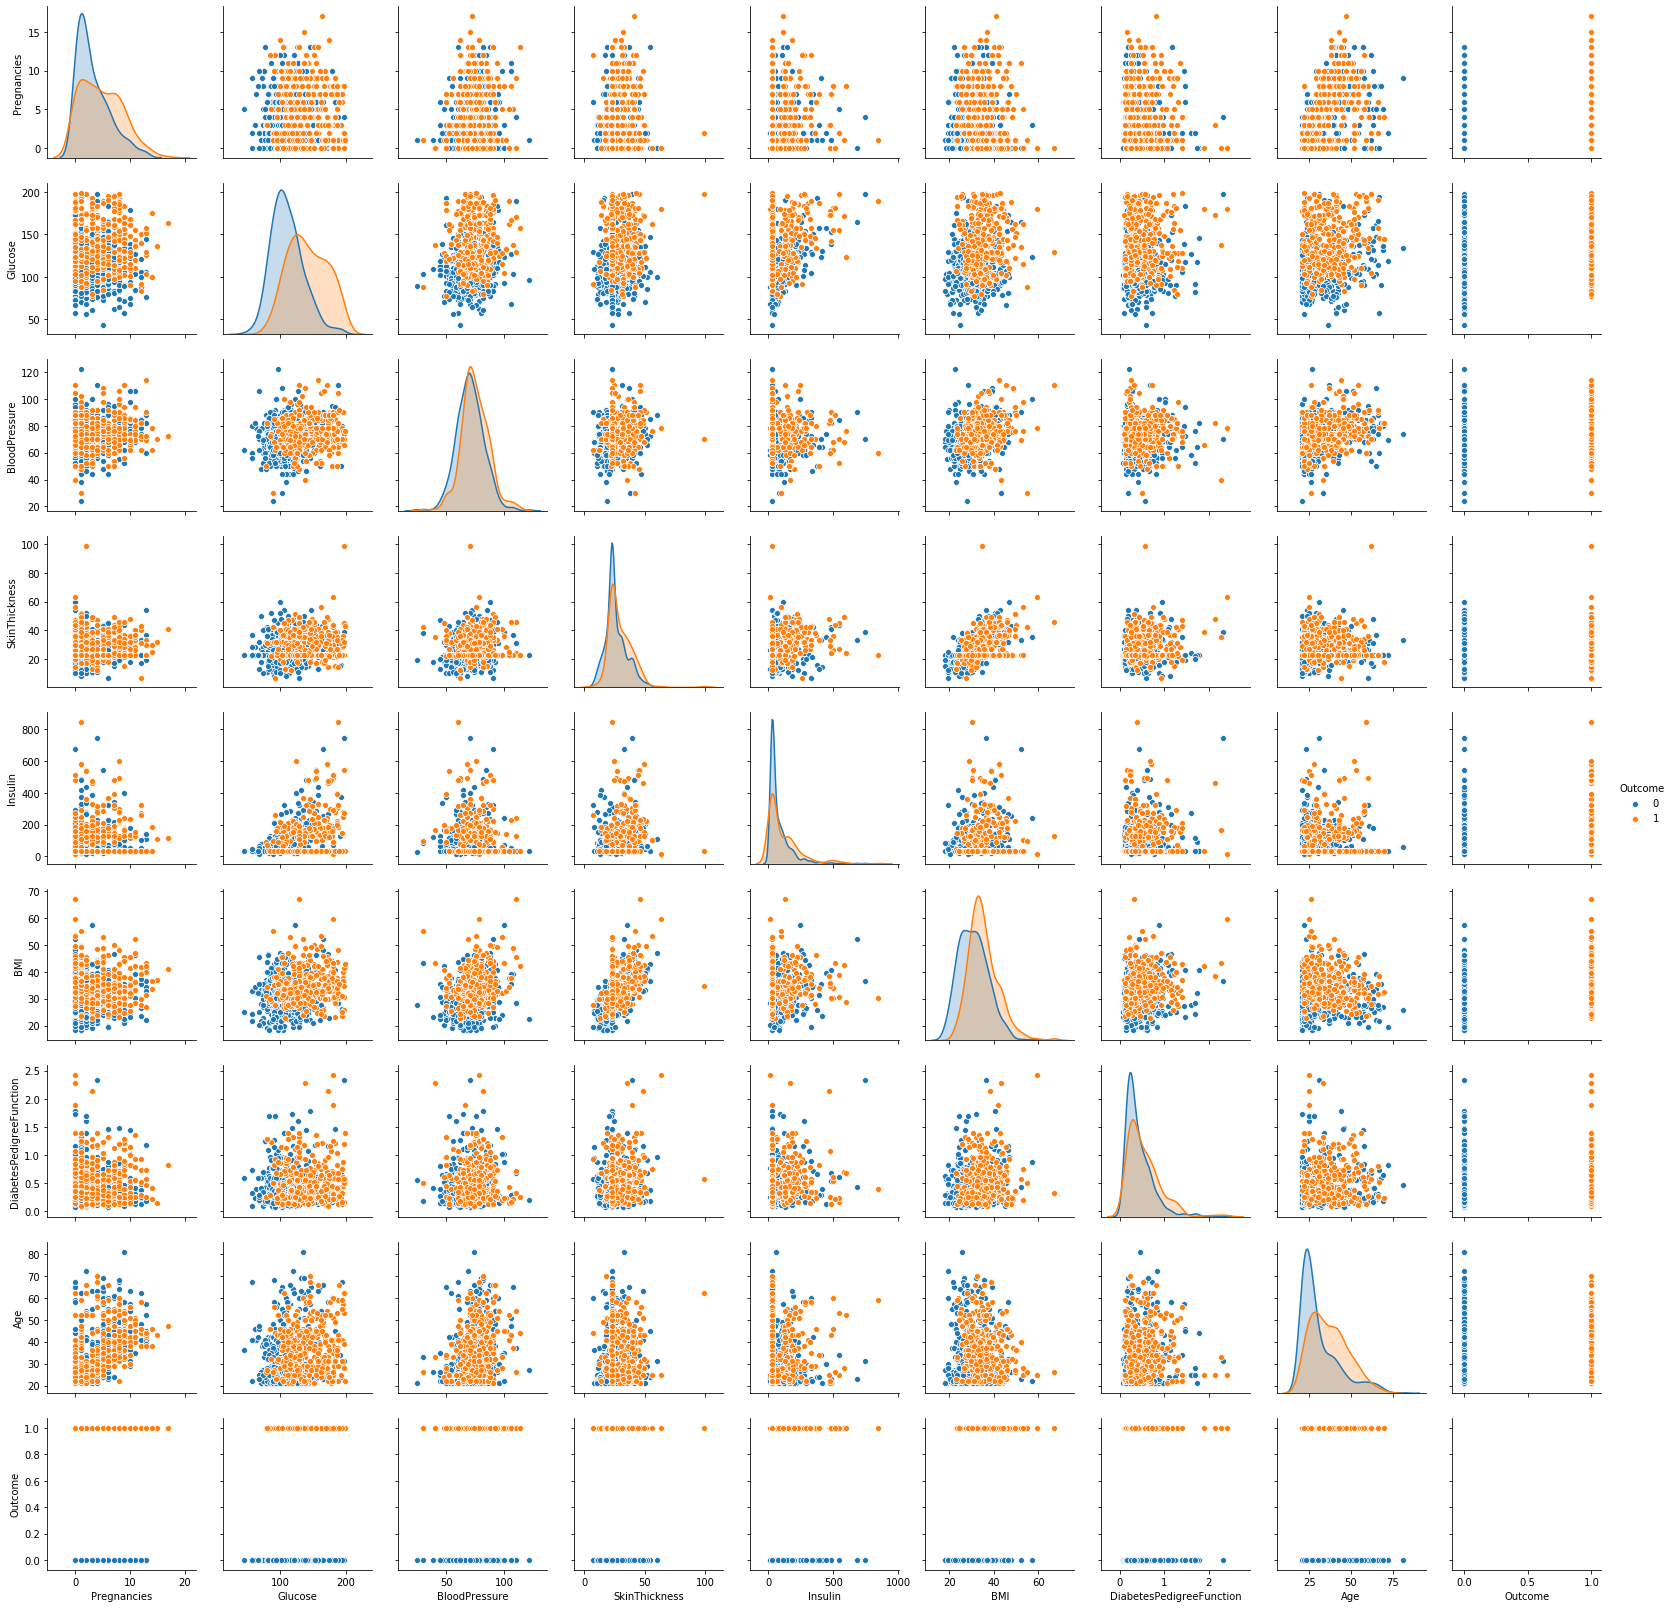

In [49]:
sns.pairplot(dataset_copy,hue="Outcome")

plotting pair panels, helps us in understanding the linear dependancy that the data has within themselves. Theortically , there should be
none, but in ideal world, it will have and this is evident as seen in the panels where there are linear graphs seen

In [54]:
def age_group(x):
    if ((x['Age']>=21) & (x['Age']<=31)):
        return 'Young (21-30)'
    elif ((x['Age']>=32) & (x['Age']<=50)):
        return 'Middle (31-50)'
    else:
        return 'Old'
dataset_copy['Age_Group']=dataset_copy.apply(age_group,axis=1)

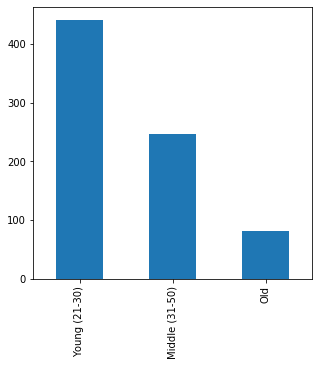

In [57]:
dataset_copy['Age_Group'].value_counts(ascending=False).plot(kind= 'bar',figsize=(5,5))

data is collected more from young people group and least from old people

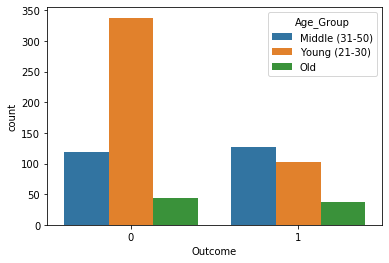

In [58]:
sns.countplot(x="Outcome", hue="Age_Group", data=dataset_copy)

Young people are more healthy evidently. Also, from the data for diabteic class, representation of middle age people is almost same in both classes

In [59]:
dataset_copy.drop(['Age_Group'],inplace=True,axis=1)

In [62]:
X = dataset_copy.iloc[:, 0:8]
y = dataset_copy.iloc[:, 8]#extracting columns for ML Model Building

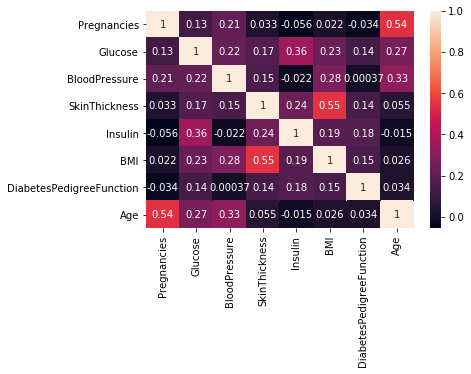

In [63]:
sns.heatmap(X.corr(), annot = True)

In [64]:
#scaling the data to bring all data under same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dataset_copy.drop(["Outcome"],axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Age','DiabetesPedigreeFunction'])

D:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Softwares\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
y = dataset_copy.Outcome

In [66]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

As we had known earlier, represntation of the class is not equal. Hence, we will go for SMOTE for upsampling 

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y)

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
os=SMOTE(random_state=0)

In [71]:
columns=X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train.ravel())
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['y'])
train_y = np.array(os_data_y).astype(int)

In [72]:
classifier = GaussianNB()
classifier.fit(os_data_X, train_y)

D:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
print("Accuracy ", classifier.score(X_test, y_test)*100)

Accuracy  75.97402597402598


## The naive baye's model is able to predict the results on diabetic dataset with accuracy of 75.97%. 

In [74]:
pd.crosstab(y_test, classifier.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,82,18,100
1,19,35,54
All,101,53,154


In [81]:
y_pred=classifier.predict(X_test)

In [82]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

   micro avg       0.76      0.76      0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [77]:
#LogisticRegression


model = LogisticRegression()
#fiting the model
model.fit(os_data_X,os_data_y)
#prediction
prediction = model.predict(X_test)

D:\Softwares\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

Accuracy  74.02597402597402


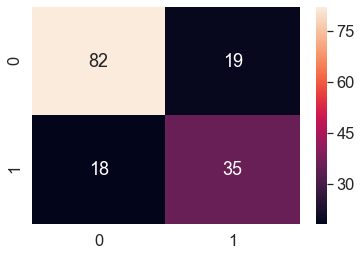

In [83]:
#building confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

There is no reasonable difference in the accuracy score for models built on Naive Bayes and Logistic Regression. 